In [1]:
import pandas as pd

## Data

In [2]:
# Read Data
df = pd.read_excel('../cases.xlsx')

# Cleansing
df['Staff/Student'] = df['Staff/Student'].str.capitalize()

# Add a 'date' column
date = pd.to_datetime([d[0] for d in df['Case Ref.'].str.split('-')])
df['Date'] = pd.Series(date)

df.head()

,Case Ref.,Staff/Student,Dept,Hall Resident,Reported Status,Date of Last Presence on Campus,Place(s) Visited and Special follow-up actions,Date
0,20220207-1,Student,SN,N,Preliminary Positive,2022-01-29 00:00:00,VA324,2022-02-07
1,20220207-2,Student,APSS,N,Confirmed,2022-01-20 00:00:00,R406,2022-02-07
2,20220207-3,Student,ABCT,N,Confirmed,2022-01-25 00:00:00,Y604,2022-02-07
3,20220207-4,Student,SN,N,Confirmed,2022-01-27 00:00:00,N.A.,2022-02-07
4,20220208-1,Student,LSGI,N,Positive (taking rapid antigen test),2022-02-07 00:00:00,ZN604,2022-02-08


## Daily Cases

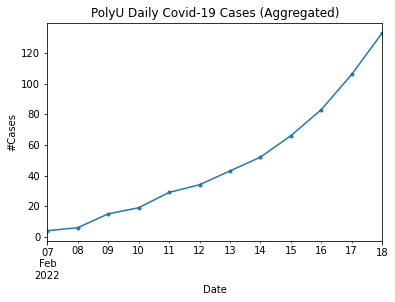

In [3]:
case_by_day = df.groupby(['Date'])['Case Ref.'].count().cumsum()
args = {
    'title': "PolyU Daily Covid-19 Cases (Aggregated)",
    'kind': 'line',
    'style': '.-',
    'xlabel': 'Date',
    'ylabel': '#Cases'
}

ax_case_by_day = case_by_day.plot(**args)

## Comparison among Groups

In [4]:
# daily cases for different groups
def group_by_date_with(column_name, **args):
    gb = df.groupby(['Date', column_name]).count().unstack()['Case Ref.']
    gb = gb.fillna(0)
    gb = gb.cumsum()
    gb.plot(kind='line', **args)

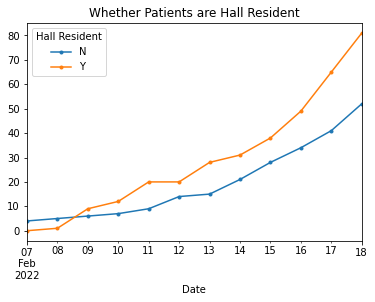

In [5]:
group_by_date_with('Hall Resident', style = '.-', title='Whether Patients are Hall Resident')

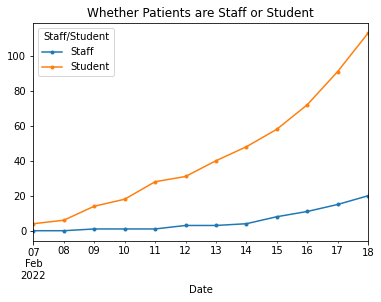

In [10]:
group_by_date_with('Staff/Student', style='.-',title='Whether Patients are Staff or Student')

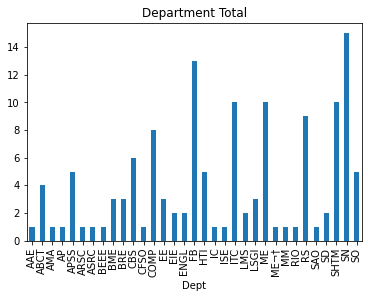

In [8]:
ax = df[['Dept', "Case Ref."]].groupby('Dept').count().plot(kind='bar', title='Department Total', legend=False)